#### Anime Recommendations - Data: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

In [2]:
##necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns 
import sys
import os 

In [3]:
DATA_DIR = "data"
anime_df_path = os.path.join(DATA_DIR,'anime.csv')
rating_df_path = os.path.join(DATA_DIR,'rating.csv')
df_anime_names = pd.read_csv(anime_df_path,header=[0])
df_ratings = pd.read_csv(rating_df_path,header=[0])

In [4]:
df_anime_names.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df_ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
def datatypecheck(df):
    for col in df.columns:
        print(f"{col}:")
        print(df[col].dtype)
        print(type(df[col][0]))
        print("-------------------------------")


In [7]:
print("Anime dataframe datatypes: ")
datatypecheck(df_anime_names)
print("**************************************")
print("---------------------------------------")
print("---------------------------------------")
print("**************************************")
print("Ratings dataframe datatypes: ")
datatypecheck(df_ratings)

Anime dataframe datatypes: 
anime_id:
int64
<class 'numpy.int64'>
-------------------------------
name:
object
<class 'str'>
-------------------------------
genre:
object
<class 'str'>
-------------------------------
type:
object
<class 'str'>
-------------------------------
episodes:
object
<class 'str'>
-------------------------------
rating:
float64
<class 'numpy.float64'>
-------------------------------
members:
int64
<class 'numpy.int64'>
-------------------------------
**************************************
---------------------------------------
---------------------------------------
**************************************
Ratings dataframe datatypes: 
user_id:
int64
<class 'numpy.int64'>
-------------------------------
anime_id:
int64
<class 'numpy.int64'>
-------------------------------
rating:
int64
<class 'numpy.int64'>
-------------------------------


In [8]:
print("nrows: {}\nncols: {}".format(df_anime_names.shape[0],df_anime_names.shape[1]))
print("nrows: {}\nncols: {}".format(df_ratings.shape[0],df_ratings.shape[1]))

nrows: 12294
ncols: 7
nrows: 7813737
ncols: 3


In [9]:
df_anime_names.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
df_ratings.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [11]:
df_anime_names.dropna(inplace=True)

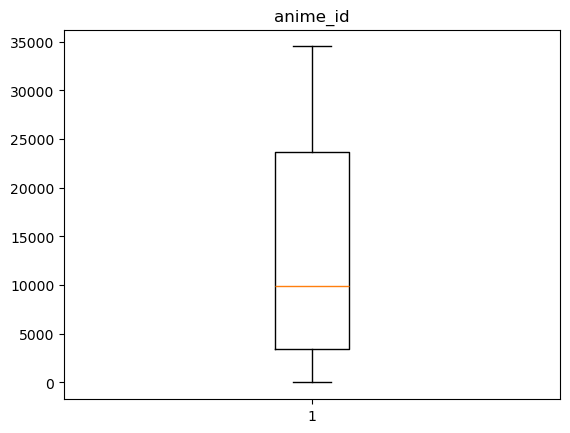

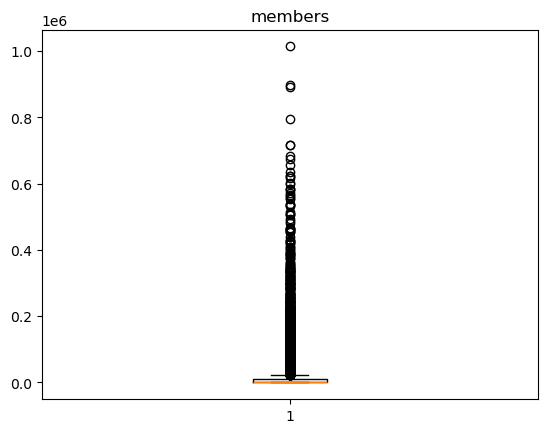

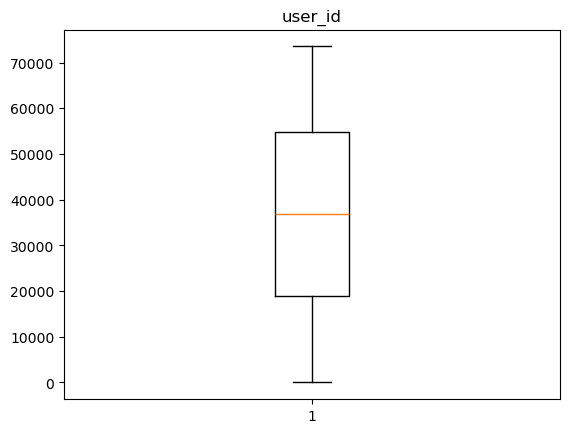

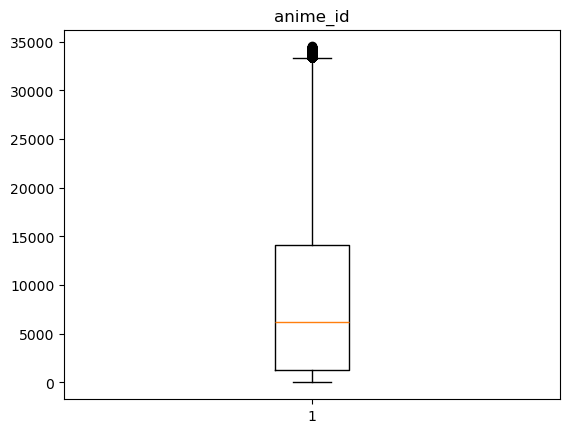

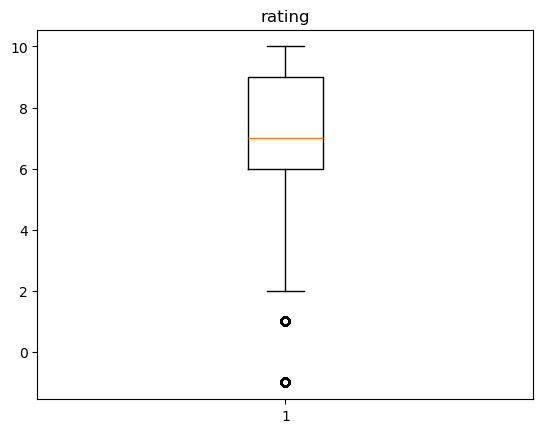

In [12]:
def boxPlotter(df):
        
    for col in df.columns:
        if df[col].dtype == 'int64':
            plt.boxplot(df[col])
            plt.title(col)
            plt.show()

        else:
            continue

boxPlotter(df_anime_names)
boxPlotter(df_ratings)

In [13]:
def outliers_detector(data):    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    z_scores = zscore(data)

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
    num_outliers_iqr = len(outliers_iqr)
    outliers_z = data[(z_scores > 3) | (z_scores < -3)]
    num_outliers_z = len(outliers_z)

    print(f'Number of outliers using IQR: {num_outliers_iqr}')
    print(f'Number of outliers using Z-score: {num_outliers_z}')
    

In [14]:
outliers_detector(df_anime_names['rating'])

Number of outliers using IQR: 235
Number of outliers using Z-score: 68


In [15]:
df_anime_names.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [16]:
df_anime_names.sort_values(by='anime_id')

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848
...,...,...,...,...,...,...,...
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51
10444,34490,Sushi Azarashi,Comedy,TV,30,3.00,12
9266,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75
2726,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295
